# The Poisson Distribution and CLT

The CLT is responsible for this remarkable result:

>The distribution of a sample average tends to Normal, even when the distribution from which the average is computed is decidedly non-Normal.

The distribution of an average will tend to be Normal as the sample size increases, regardless of the distribution from which the average is taken unless the moments of the parent distribution do not exist. 

Furthermore, this normal distribution will have the same mean as the parent distribution, AND, variance equal to the variance of the parent divided by the sample size.

We examine this idea with the poisson distribution.

1. Pull 10000 observations from poisson and plot the histogram.

2. Pull 10000 pairs (2-tuples) of observations and take the 2-point average. Plot a histogram of those 10000 averages.

3. Pull 10000 3-tuples of observations and take the 3-point average. Plot that histogram ....

4. Do so for larger n ... and we see, iteratively, how it begins to resemble a normal distribution.


In [111]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

np.random.seed(69)

In [219]:
x1 = np.random.poisson(1,(10000))

(array([  3.71500000e+03,   3.66800000e+03,   1.83000000e+03,
          0.00000000e+00,   6.09000000e+02,   1.46000000e+02,
          0.00000000e+00,   2.80000000e+01,   3.00000000e+00,
          1.00000000e+00]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

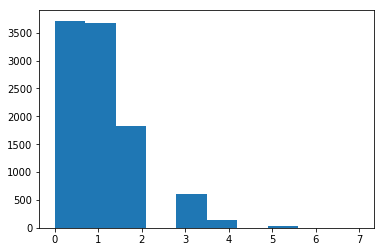

In [220]:
%matplotlib inline
plt.hist(x1)

In [221]:
vector = []
for i in range(0,10000):
    x2 = np.random.poisson(1,2)
    mean = np.mean(x2)
    vector.append(mean)

(array([ 1297.,  2743.,  2786.,  1771.,     0.,   892.,   347.,   123.,
           36.,     5.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

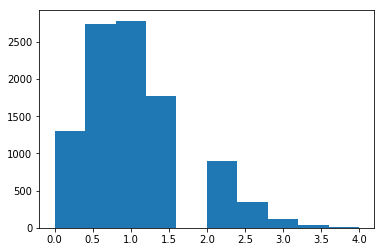

In [222]:
plt.hist(vector)

In [224]:
vector = []
for i in range(0,10000):
    x3 = np.random.poisson(1,3)
    mean = np.mean(x3)
    vector.append(mean)

(array([ 2000.,  2253.,  2245.,  1664.,   984.,   739.,    80.,    27.,
            3.,     5.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

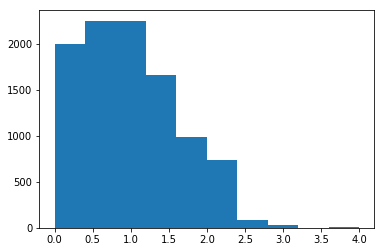

In [225]:
plt.hist(vector)

In [181]:
vector = []
for i in range(0,10000):
    x4 = np.random.poisson(1,10000)
    mean = np.mean(x3)
    vector.append(mean)

(array([  2.00000000e+00,   3.50000000e+01,   2.77000000e+02,
          1.02200000e+03,   2.44400000e+03,   3.04700000e+03,
          2.14100000e+03,   8.30000000e+02,   1.71000000e+02,
          3.10000000e+01]),
 array([ 0.9573 ,  0.96523,  0.97316,  0.98109,  0.98902,  0.99695,
         1.00488,  1.01281,  1.02074,  1.02867,  1.0366 ]),
 <a list of 10 Patch objects>)

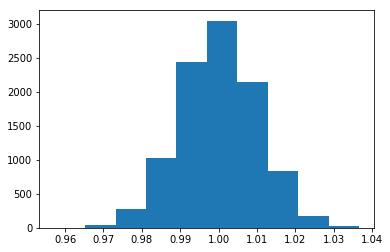

In [182]:
plt.hist(vector)

## Checking Mean and Variance

For X ~ Poisson($\lambda)$,  
the theoretical mean is found with:
> $E[X] = \lambda $

Then $E[X] = 1$


In [143]:
estimatedmean = np.mean(vector)
print(estimatedmean)

1.00001262


The theoretical variance is found with:
> $Var[X] = \lambda$

So Var[X] = 1.

In [96]:
estimatedvariance = np.var(x1)
print(estimatedvariance)

1.00830784


Further, the CLT says that the average is distributed $N(E[X], \frac{Var[X]}{n})$, or $N(1,\frac{1}{100})$.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


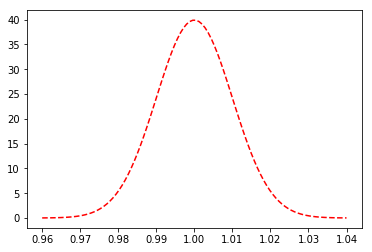

In [130]:
x = np.linspace(.96, 1.04, 100)
plt.plot(x,mlab.normpdf(x, 1, 1/100), '--r')
plt.show()

Which looks very similar to the averages.

(array([  2.00000000e+00,   3.50000000e+01,   2.77000000e+02,
          1.02200000e+03,   2.44400000e+03,   3.04700000e+03,
          2.14100000e+03,   8.30000000e+02,   1.71000000e+02,
          3.10000000e+01]),
 array([ 0.9573 ,  0.96523,  0.97316,  0.98109,  0.98902,  0.99695,
         1.00488,  1.01281,  1.02074,  1.02867,  1.0366 ]),
 <a list of 10 Patch objects>)

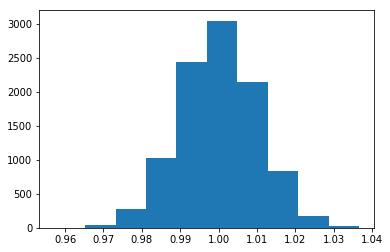

In [184]:
plt.hist(vector)

## Constructing a Confidence Interval

The empirical Confidence Interval can be constructed with:
> ($\frac{\bar{X} - \tau_{N,\alpha}S}{\sqrt{N}},\frac{\bar{X} + \tau_{N,\alpha}S}{\sqrt{N}}) $

where $\bar{X}$ is the sample mean, S is the sample standard deviation, N is the sample size, and $\tau_{N,\alpha}$ comes from the t distribution. 

In [212]:
lower = (np.mean(vector) - stats.t.pdf(.05,1)*1/10)
upper = (np.mean(vector) + stats.t.pdf(.05,1)*1/10)

print("(",lower,",",upper,")")

( 0.968314710406 , 1.03181792959 )


Now we check how often our random samples are outside these intervals.

In [213]:
count = 0
for i in vector:
    if i < lower or i > upper:
        count += 1
        
print(count)
count/len(vector)

13


0.0013

We see that there are only 13 values outside the confidence interval.